# Multiple Linear Regression

![Screenshot 2024-10-20 at 10.59.54 PM.png](<attachment:Screenshot 2024-10-20 at 10.59.54 PM.png>)
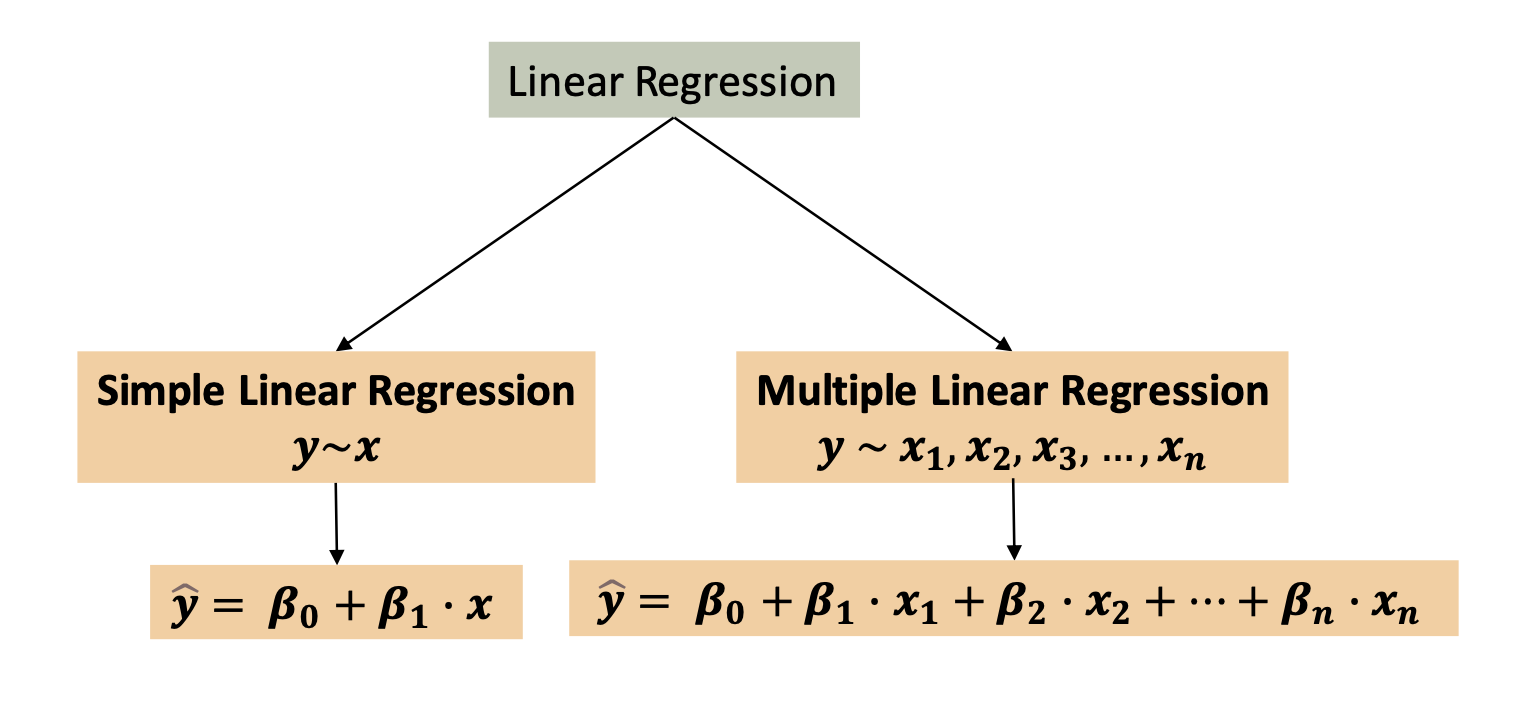

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")


### Step - 1 Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND , ADMIN , MKT

### Step - 2 Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3 - Seperating X and Y

In [6]:
x = df[["RND","ADMIN","MKT"]]
y = df[["PROFIT"]]

In [7]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step - 4 Create a Model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [10]:
# R2 Score
model.score(x,y)

0.9507459940683246

In [11]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [12]:
model.intercept_

array([50122.19298987])

In [13]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

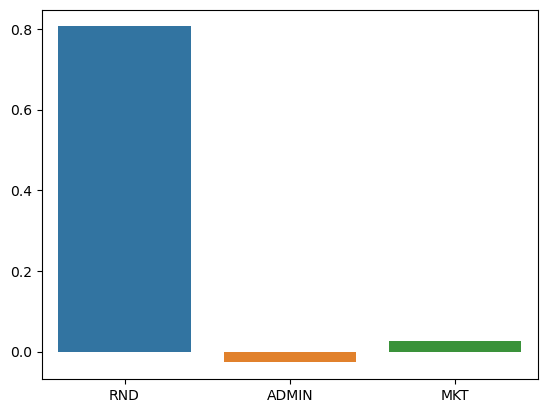

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x= x.columns,y = model.coef_.flatten())
plt.show()

In [21]:
coef = pd.Series(model.coef_.flatten(),index=x.columns)
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

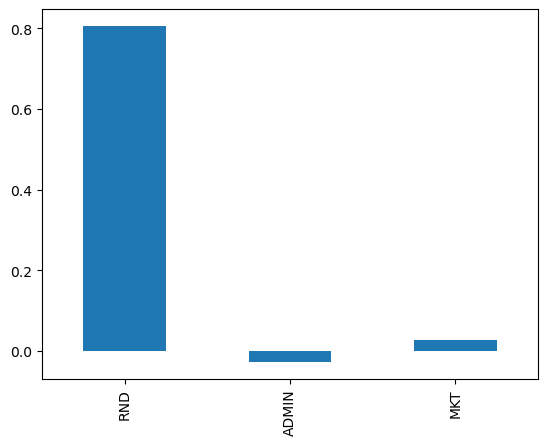

In [22]:
coef.plot(kind = 'bar')

### from above graph I can conclude that RND budget will impact more on incresing the profit

## PROFIT = 50122.193 + 0.805715 * RND + (-0.026816)*ADMIN + 0.027228*MKT

### Evaluating the model

In [23]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [26]:
def evaluate_model(model,x,y):
    # predict results on x
    ypred = model.predict(x)
    # calculate the metrics
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2score = r2_score(y,ypred)
    #print all above results
    print(f'''Mean Squared Error : {mse:.2f},
    Root Mean Squared Error : {rmse:.2f},
      Mean Absolute Error : {mae:.2f},
      Mean Absolute Percentage Error : {mape:.4f},
      R2 Score : {r2score:.4f}''')

In [27]:
evaluate_model(model,x,y)

Mean Squared Error : 78417126.02,
    Root Mean Squared Error : 8855.34,
      Mean Absolute Error : 6471.45,
      Mean Absolute Percentage Error : 0.1060,
      R2 Score : 0.9507


### From above results R2 Score > 0.8 hence it is a good model
#### Out of sample prediction

In [28]:
x.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [29]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [31]:
rnd = 60_000
admin = 50_000
mkt = 50_000
profit_pred = model.predict([[rnd,admin,mkt]])
print(f"RND Budget : {rnd} , ADMIN Budget :{admin}, MKT Budget : {mkt}")
print(f"Estimated Profit : {profit_pred}")


RND Budget : 60000 , ADMIN Budget :50000, MKT Budget : 50000
Estimated Profit : [[98485.70080511]]


In [32]:
ypred = model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [33]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
